Podstawy reprezentacji i analizy danych projekt zaliczeniowy
autorzy: Artur Arciszewski i Kamil Gomuła
Data: 27.01.2026
Nazwa zbioriu: Air Quality and Pollution Assessment
Zadania: przeanalizowanie danych i stworzenie modelu klasyfikacji jakości powietrza

In [1]:
# importy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid

## Opis zbioru
- Temperature (°C): Średnia temperatura w regionie
- Humidity (%): względna wilgoć powietrza w regionie
- PM2.5 Concentration (µg/m³): stężenie.
- PM10 Concentration (µg/m³): Coarse particulate matter levels.
- NO2 Concentration (ppb): Nitrogen dioxide levels.
- SO2 Concentration (ppb): Sulfur dioxide levels.
- CO Concentration (ppm): Carbon monoxide levels.
- Proximity to Industrial Areas (km): Distance to the nearest industrial zone.
- Population Density (people/km²): Number of people per square kilometer in the region.
- Target Variable: Air Quality Levels
  -  Good: Clean air with low pollution levels.
  -  Moderate: Acceptable air quality but with some pollutants present.
  -  Poor: Noticeable pollution that may cause health issues for sensitive groups.
  -  Hazardous: Highly polluted air posing serious health risks to the population.

In [2]:
data = pd.read_csv('./data.csv')
data.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

In [3]:
data.isna().sum().sum()

np.int64(0)

analiza

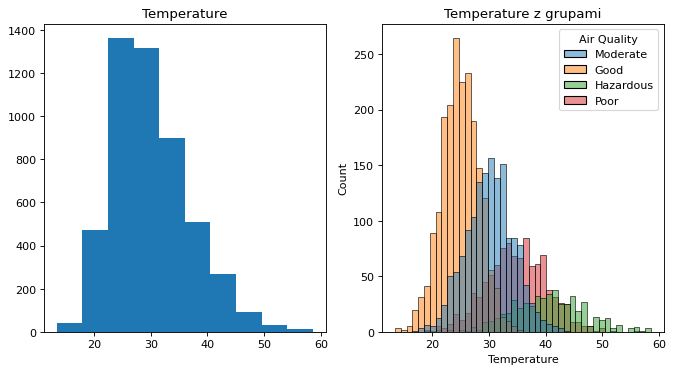

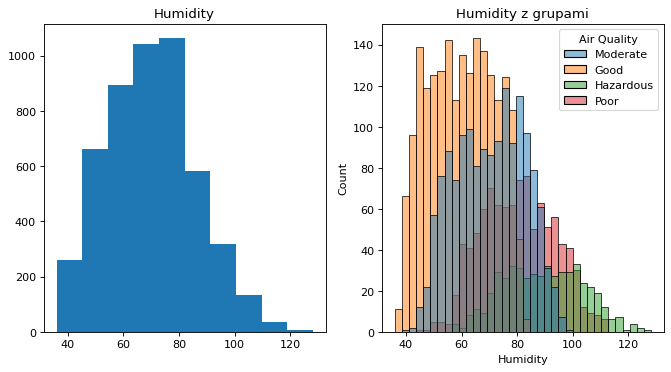

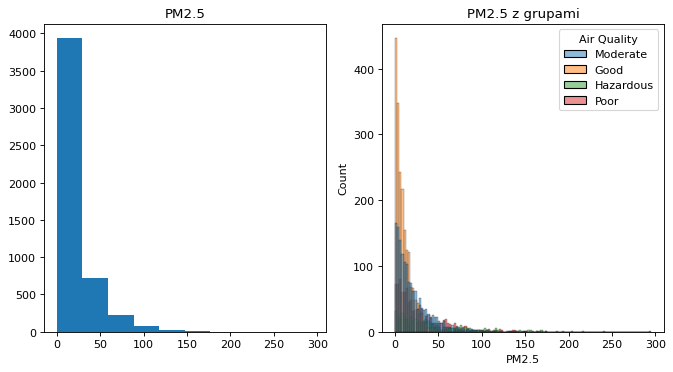

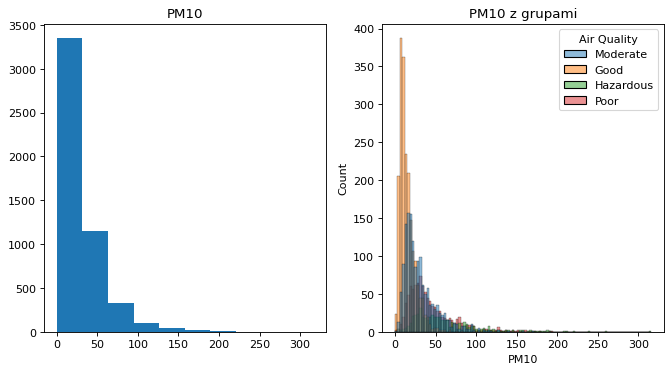

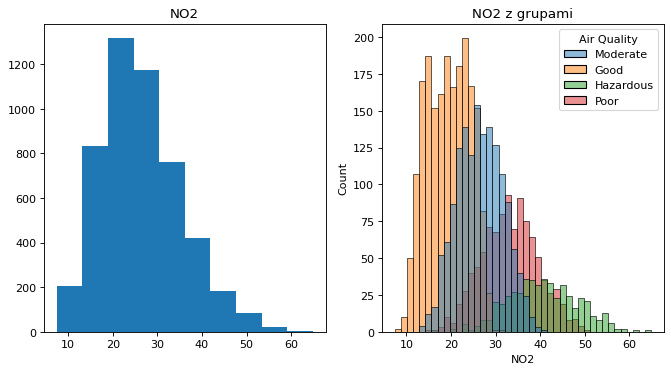

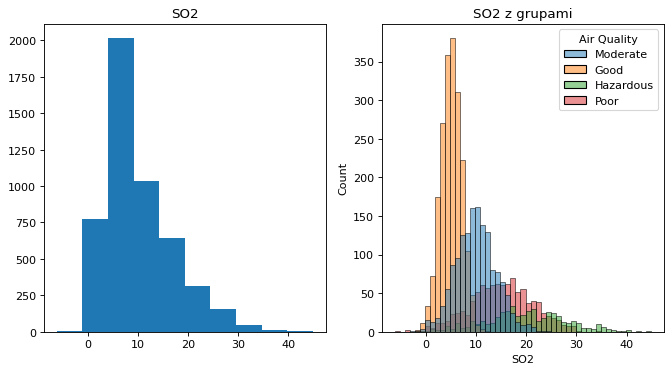

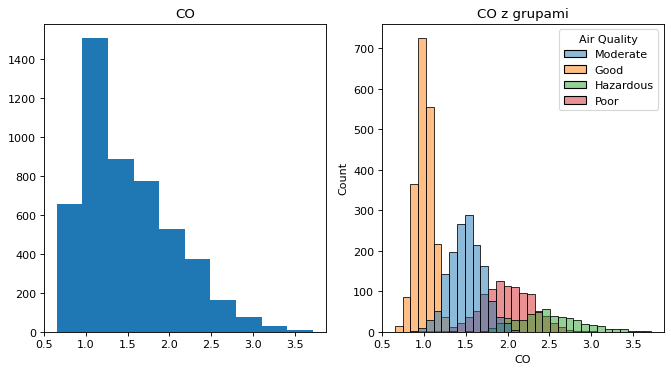

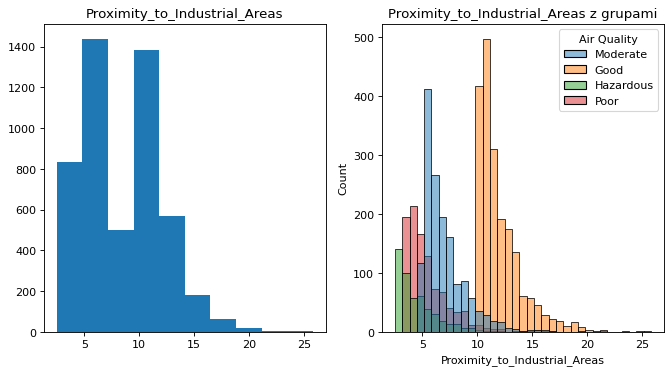

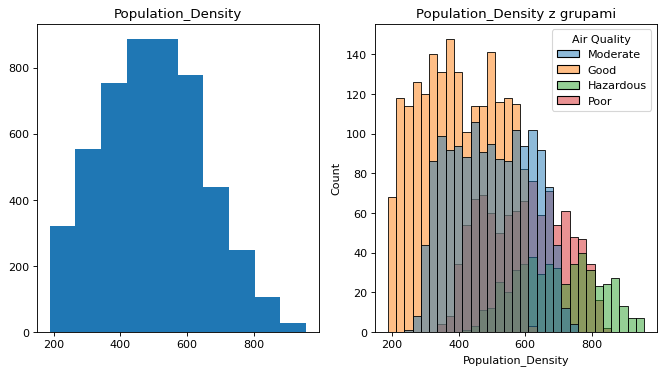

In [6]:
# histogramy
for i in range(0, data.shape[1]-1):
    plt.figure(figsize=(10,5), dpi= 80)
    
    plt.subplot(1,2,1)
    plt.title(data.columns[i])
    plt.hist(data.iloc[:,i])
    
    plt.subplot(1,2,2)
    plt.title(data.columns[i] + " z grupami")
    sns.histplot(data=data, x=data.columns[i], hue="Air Quality")



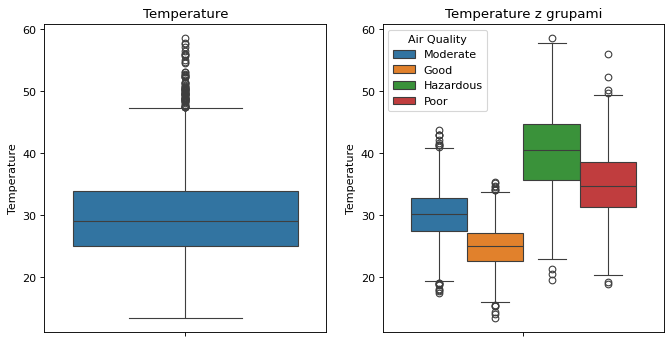

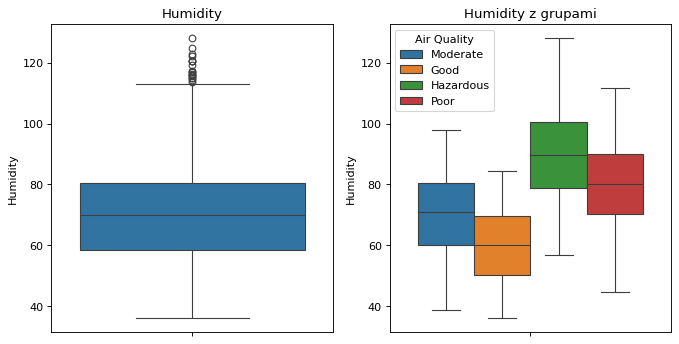

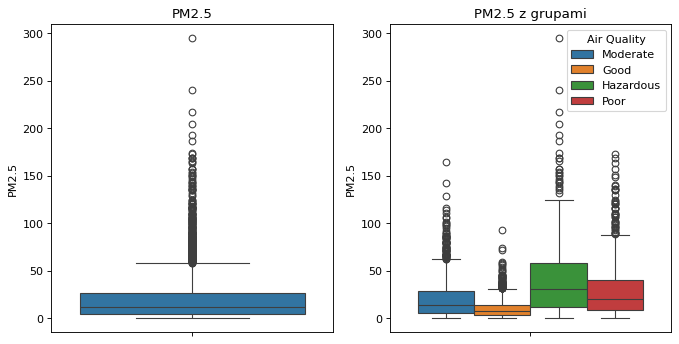

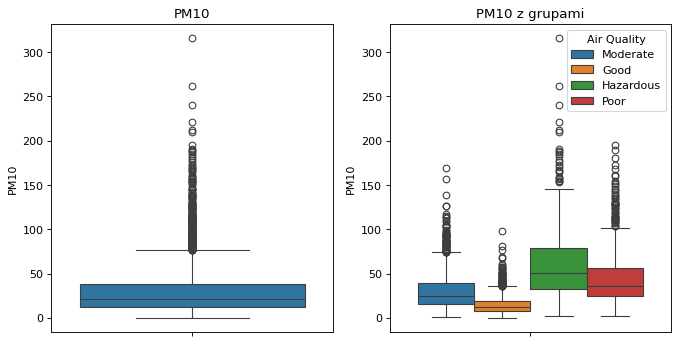

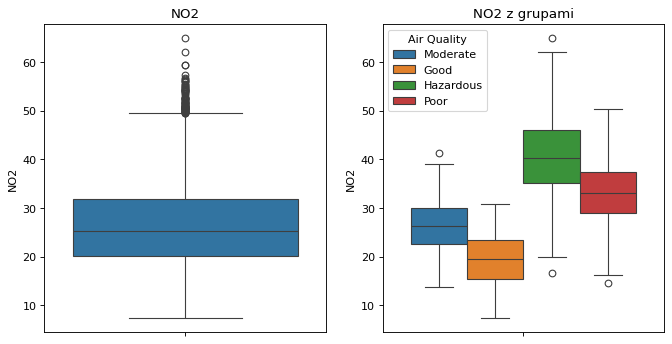

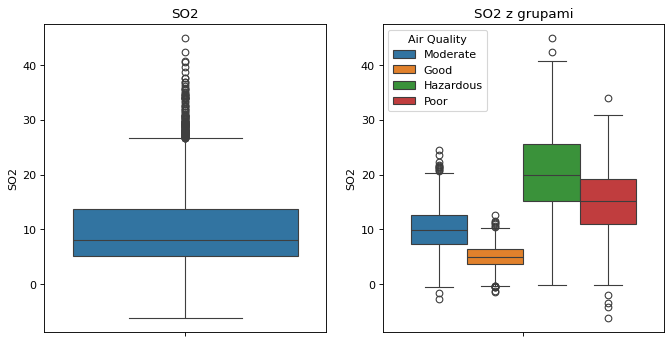

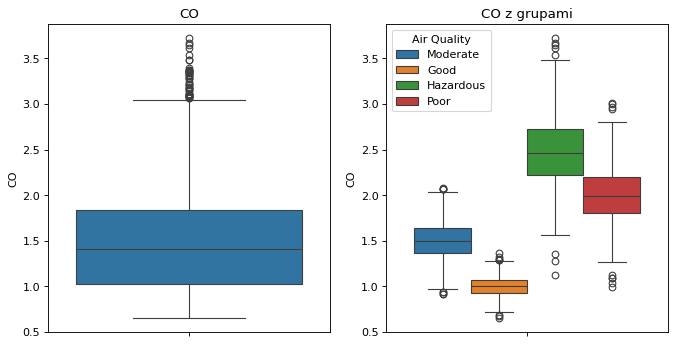

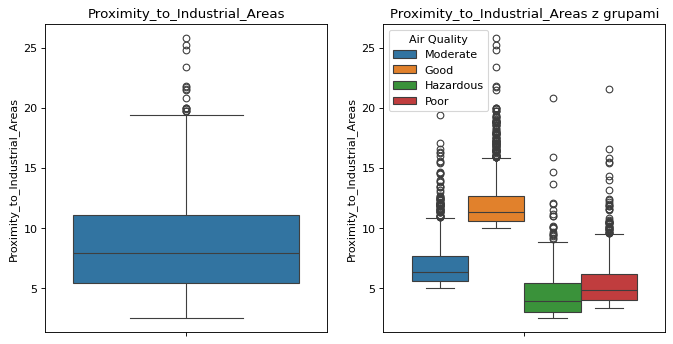

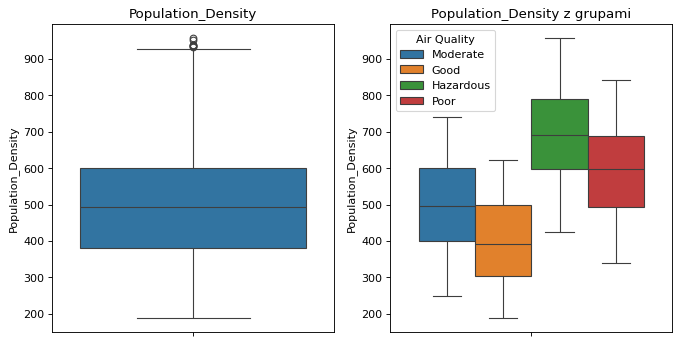

In [7]:
# boxplty dla oullajerow
for i in range(0, data.shape[1]-1):
    plt.figure(figsize=(10,5), dpi= 80)

    plt.subplot(1,2,1)
    plt.title(data.columns[i])
    sns.boxplot(data=data.iloc[:,:-1], y=data.columns[i])
    
    plt.subplot(1,2,2)
    plt.title(data.columns[i] + " z grupami")
    sns.boxplot(data=data, y=data.columns[i], hue="Air Quality")
    


In [8]:
# sprawdzanie PM2.5 PM10
for airType in data["Air Quality"].unique():
    print("powietrza jakość " + airType)
    a = data[data["Air Quality"] == airType].describe()
    print(a.loc[:,["PM2.5","PM10"]].T)
    print()

powietrza jakość Moderate
        count       mean        std  min   25%    50%     75%    max
PM2.5  1500.0  20.461800  20.418866  0.0   5.9  13.90  28.525  164.9
PM10   1500.0  30.604333  20.699621  1.3  16.0  24.45  39.300  168.7

powietrza jakość Good
        count     mean      std  min  25%   50%     75%   max
PM2.5  2000.0   9.9109  9.70967  0.0  2.8   7.0  14.200  92.7
PM10   2000.0  14.9896  9.93819 -0.2  8.1  12.1  19.325  98.0

powietrza jakość Hazardous
       count     mean        std  min     25%    50%     75%    max
PM2.5  500.0  41.9208  41.389739  0.2  12.175  30.15  57.775  295.0
PM10   500.0  61.5080  41.947185  2.2  32.200  50.75  79.325  315.8

powietrza jakość Poor
        count     mean        std  min   25%    50%   75%    max
PM2.5  1000.0  29.2358  28.586745  0.1   8.9  19.85  40.5  173.2
PM10   1000.0  44.4521  29.429487  1.9  24.3  36.05  55.8  194.7



Pomimo iż na histogramie PM2.5 PM10 wydawały się być nieroznużnialene do podziału na jakoś powietża to ich średnie się od siebie różnią. Chocisz wysokie pokrywanie się różnych jakośni czyni te atrybuty średno przydatnymi do klasyfikacji

<Figure size 800x800 with 0 Axes>

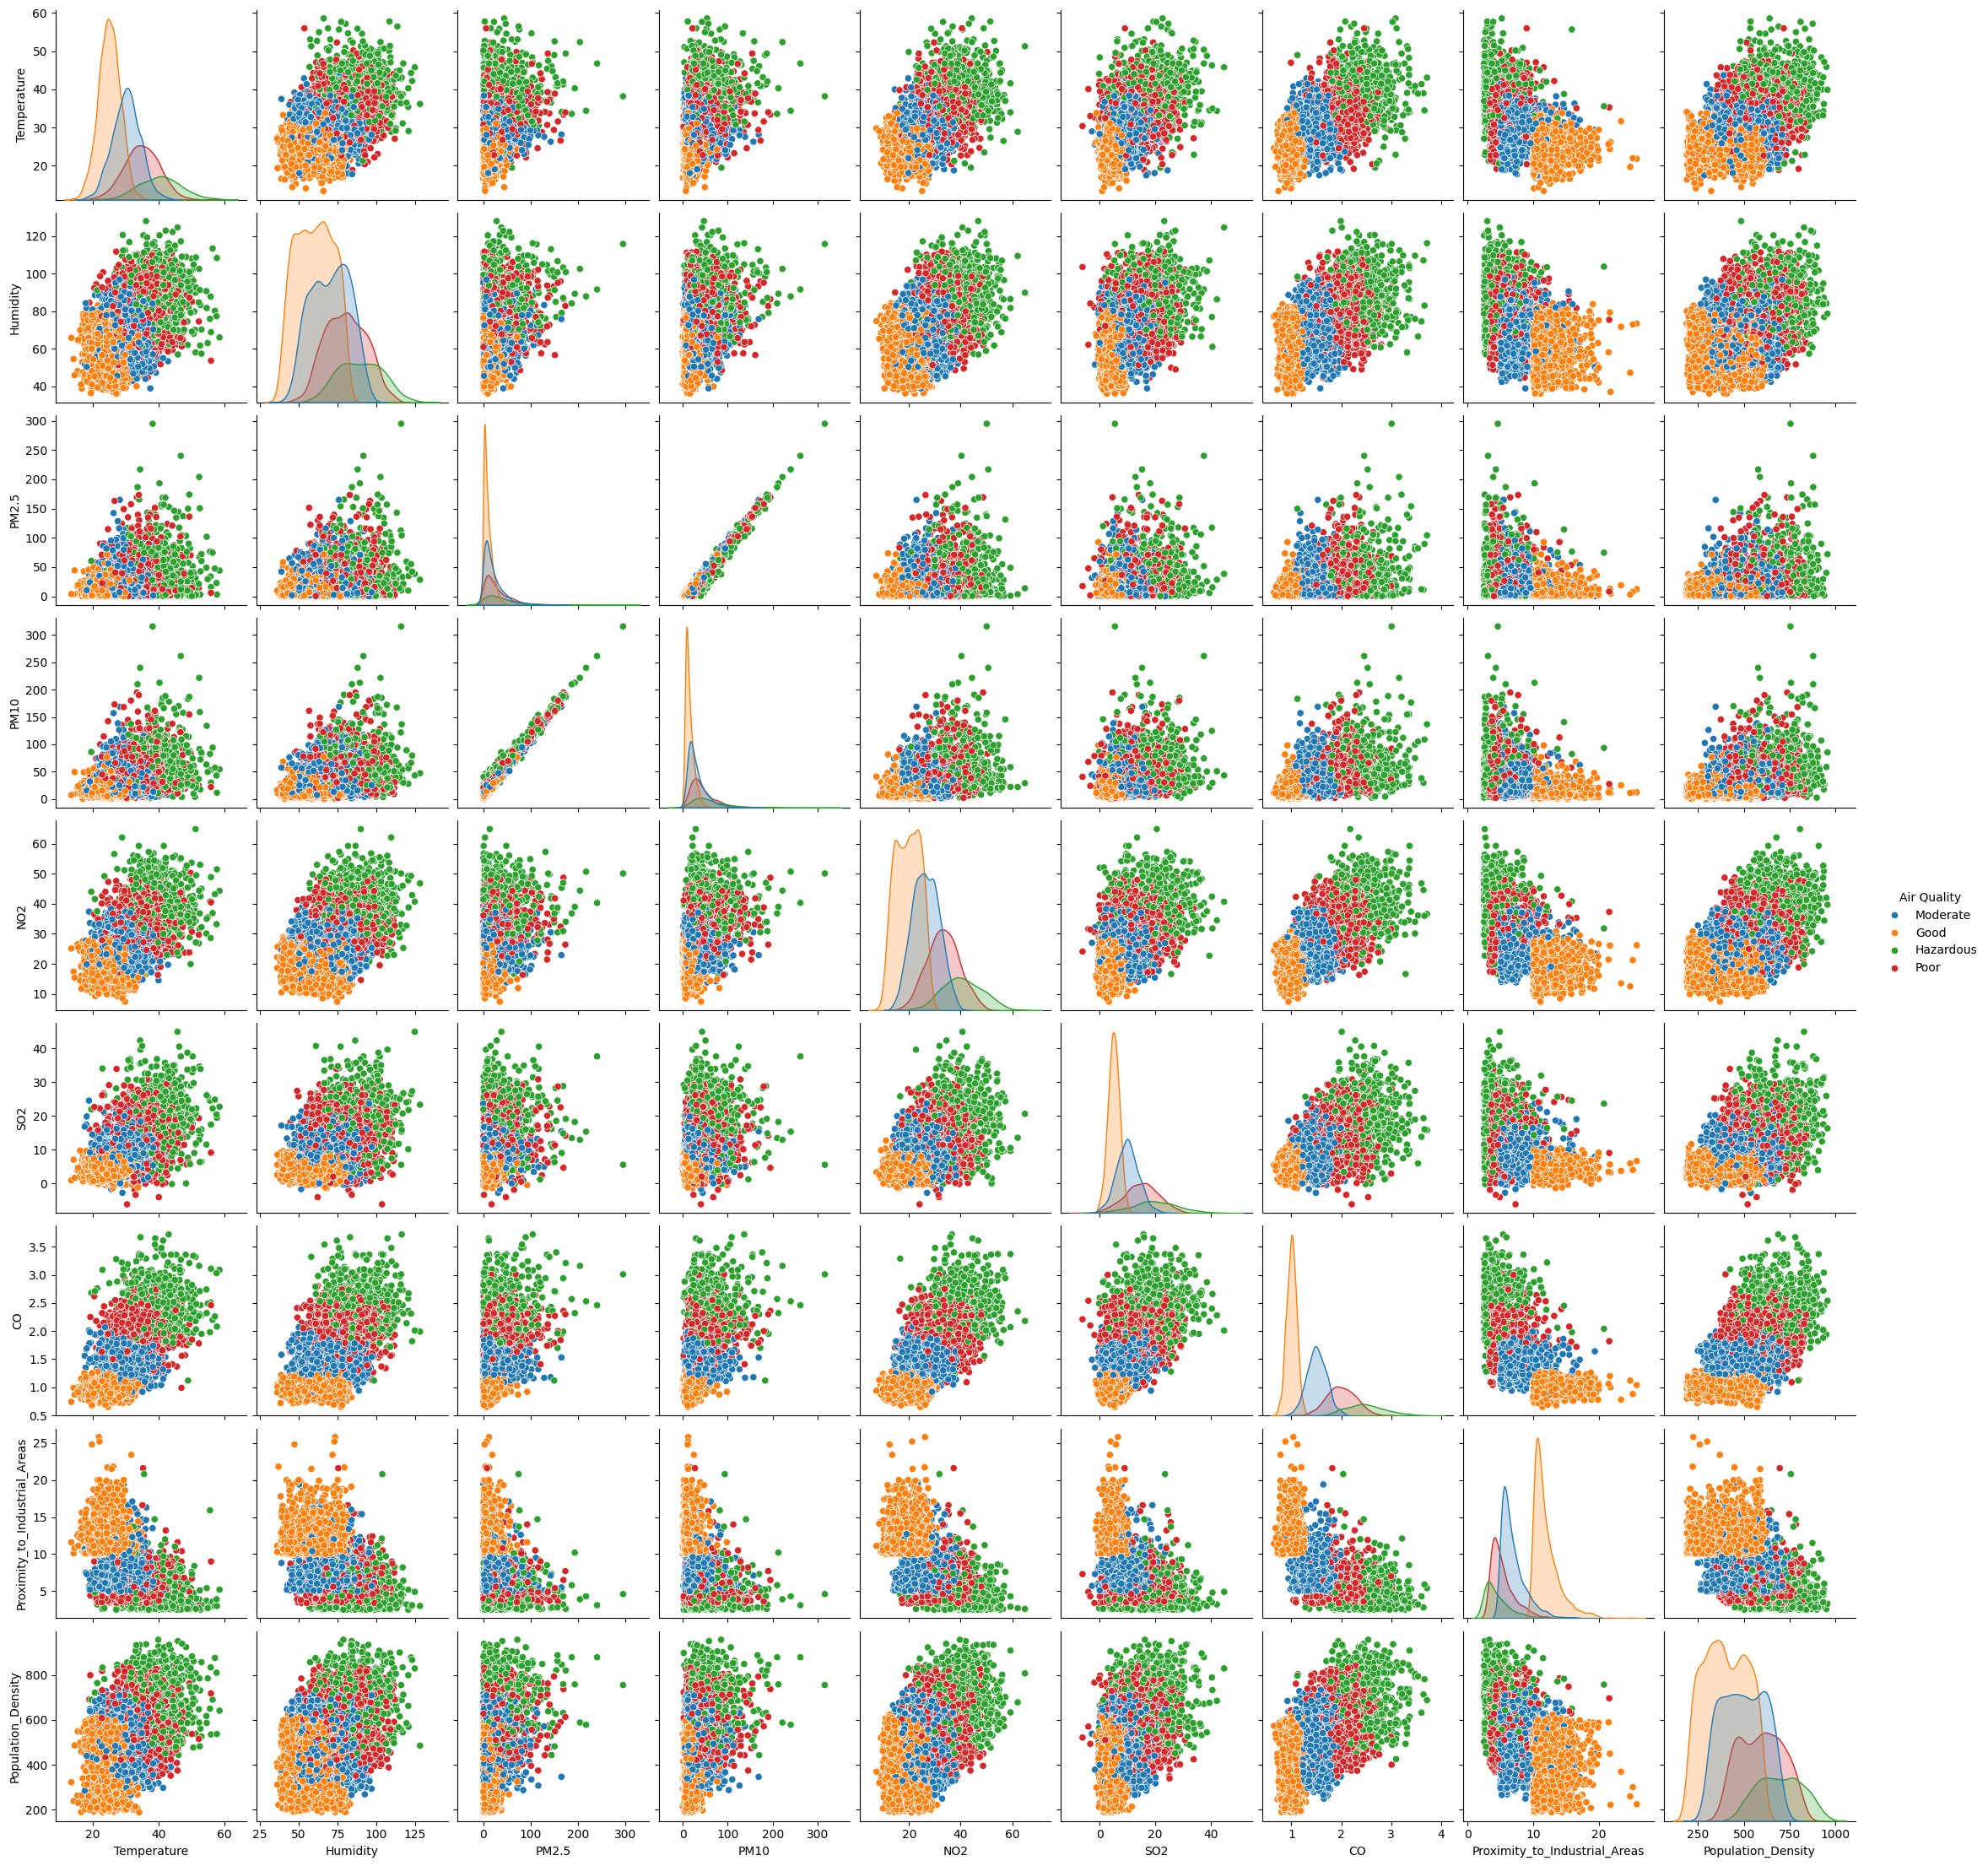

In [62]:
# pary
plt.figure(figsize=(10,10), dpi= 80)
sns.pairplot(data=data, kind="scatter", hue="Air Quality")

<Axes: >

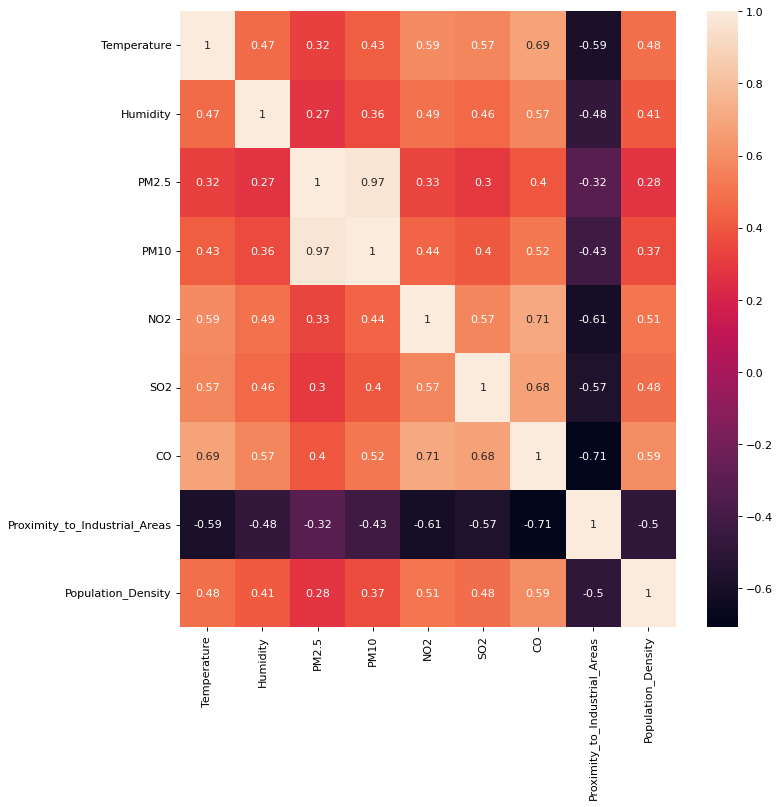

In [64]:
# coralation
plt.figure(figsize=(10,10), dpi= 80)
sns.heatmap(data.iloc[:,:-1].corr(),annot = data.iloc[:,:-1].corr())

atrybuty PM10 i PM2.5 są bardo silnie skorelowane więć aby klasyfikatorom nie mącić usywamu jeden z nich

In [72]:
data = data.drop("PM10",axis=1)

In [68]:
data.head()

Temperature  Humidity  PM2.5   NO2   SO2    CO  \
0         29.8      59.1    5.2  18.9   9.2  1.72   
1         28.3      75.6    2.3  30.8   9.7  1.64   
2         23.1      74.7   26.7  24.4  12.6  1.63   
3         27.1      39.1    6.1  13.5   5.3  1.15   
4         26.5      70.7    6.9  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

In [6]:
# data[-1] to lebel
def testModel(data, model):
    data_test, data_lern = train_test_split(data, test_size=0.7)
    
    model.fit(data_lern.iloc[:,:-1], data_lern.iloc[:,-1])

    print("dokladnosc: ", end="")
    print(model.score(data_test.iloc[:,:-1], data_test.iloc[:,-1]))
    error = pd.crosstab(data_test.iloc[:,-1] , model.predict(data_test.iloc[:,:-1]))
    plt.figure(figsize=(10,10), dpi= 80)
    sns.heatmap(error, annot = error)

In [4]:
# standaryzacja
dataRaw = data.iloc[:,:-1]
dataNormal = (dataRaw - dataRaw.mean())/dataRaw.std()
dataNormal["Air Quality"] = data["Air Quality"]

dokladnosc: 0.8926666666666667


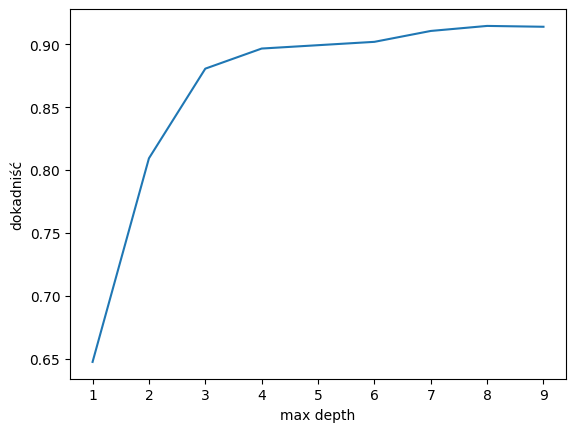

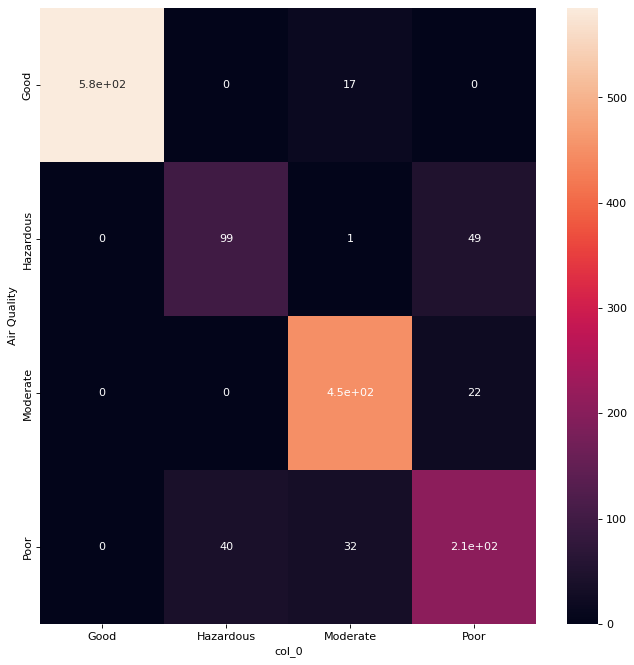

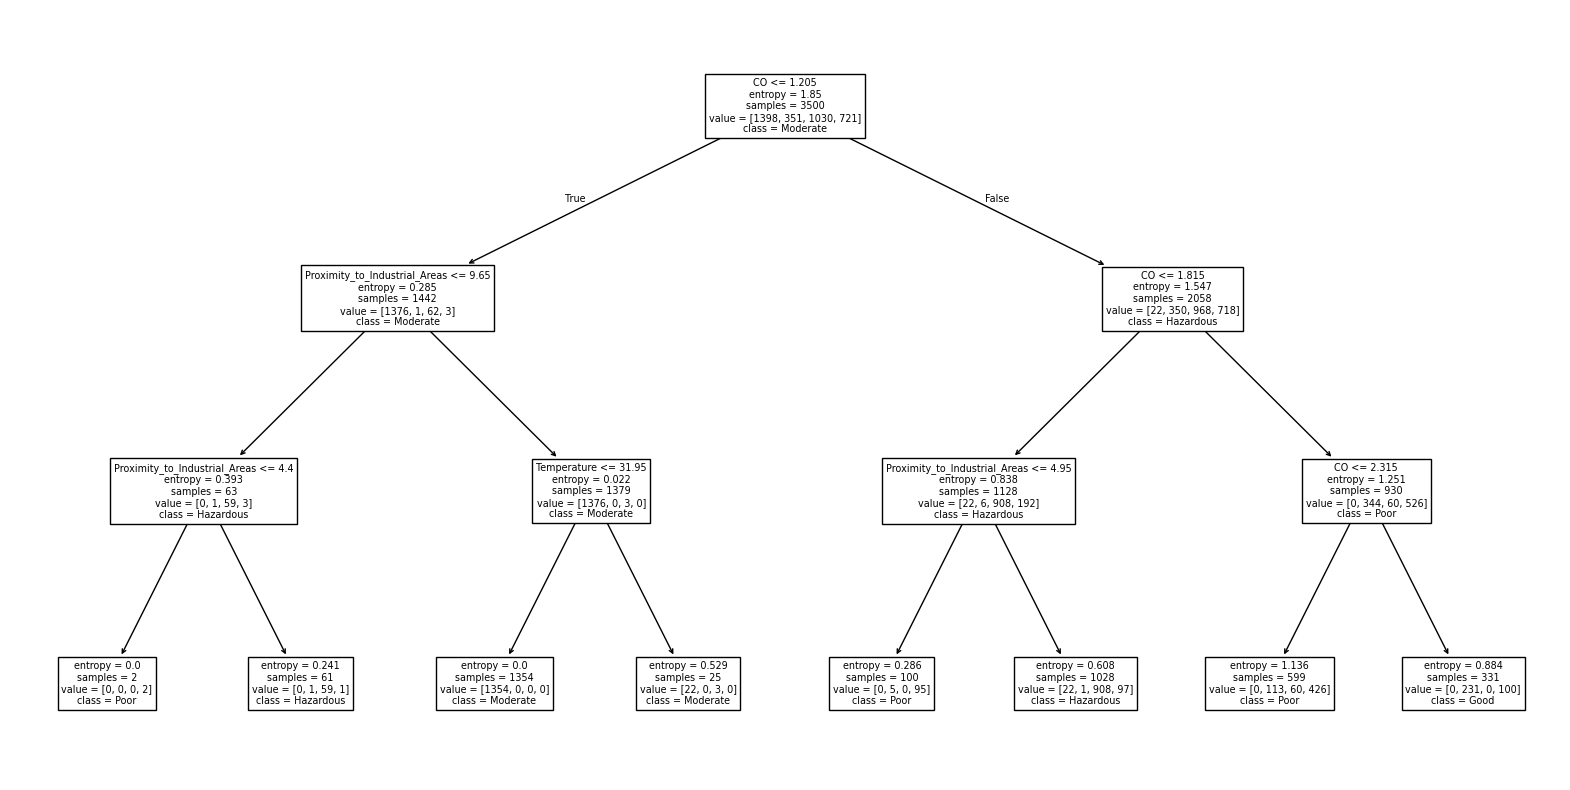

In [75]:
# testowanie trzewa

# best max_depth
data_test, data_lern = train_test_split(data, test_size=0.7)
wynik = pd.Series()
for maxDepth in range(1, 10):
    model = DecisionTreeClassifier(max_depth = maxDepth, criterion="entropy")
    model.fit(data_lern.iloc[:,:-1], data_lern.iloc[:,-1])
    # wynik.append(model.score(data_test.iloc[:,:-1], data_test.iloc[:,-1]))
    wynik[maxDepth] = model.score(data_test.iloc[:,:-1], data_test.iloc[:,-1])
# plt.title("jak dobrze dziala dla glebokosci")
plt.xlabel("max depth")
plt.ylabel("dokadniść")
wynik.plot()

from sklearn.tree import plot_tree
import sklearn.tree as tree

model = DecisionTreeClassifier(max_depth = 3, criterion="entropy")
# !!! przerobi aby bylu dwa zbiory
testModel(data, model)

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=data.columns, class_names=data["Air Quality"].unique())
plt.show()

# text_representation = tree.export_text(model, feature_names=data.columns[:-1], show_weights=True)
# print(text_representation)


dokladnosc: 0.9273333333333333


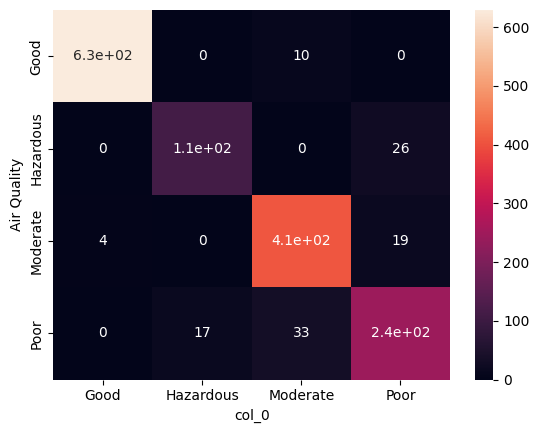

In [44]:
# testowanie trzewa
model = GaussianNB()
# !!! przerobi aby bylu dwa zbiory
testModel(data, model)


dokladnosc: 0.8893333333333333


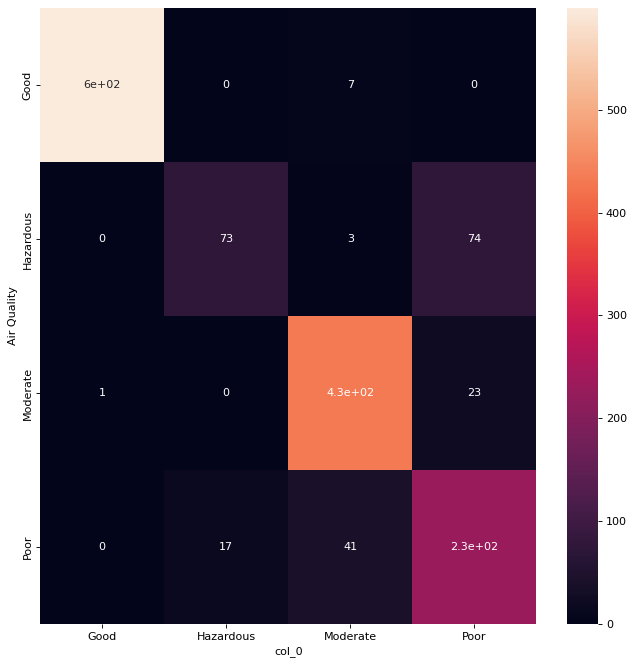

In [80]:
testModel(data.loc[:,["CO","Temperature","Proximity_to_Industrial_Areas","Air Quality"]], model)

dokladnosc: 0.9013333333333333
             Temperature   Humidity    PM2.5       PM10        NO2        SO2  \
Air Quality                                                                     
Good            24.94655  60.021950   9.9109  14.989600  19.448450   5.035000   
Hazardous       40.34780  89.473000  41.9208  61.508000  40.596200  20.023400   
Moderate        30.14200  70.211533  20.4618  30.604333  26.435133   9.976933   
Poor            34.86510  80.182900  29.2358  44.452100  33.212800  15.027000   

                   CO  Proximity_to_Industrial_Areas  Population_Density  
Air Quality                                                               
Good         0.999590                      11.987900          398.944000  
Hazardous    2.491240                       4.592400          696.010000  
Moderate     1.505293                       6.958667          497.565333  
Poor         1.999030                       5.417000          594.878000  


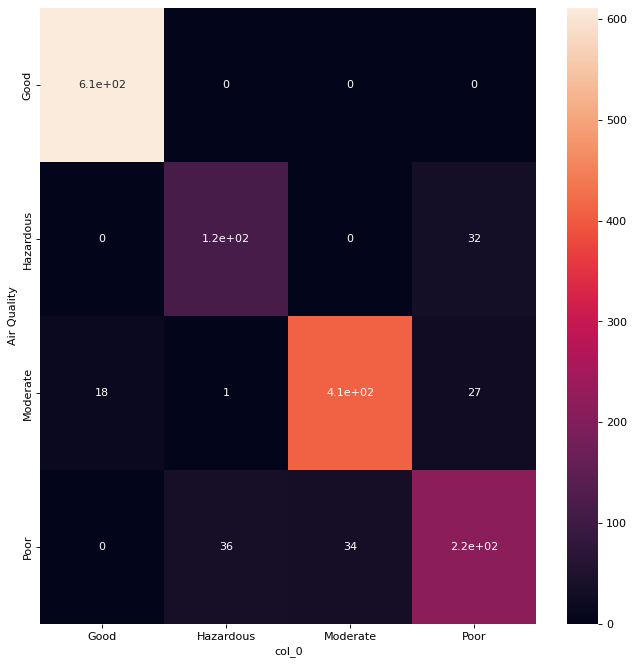

In [8]:
model = NearestCentroid()
# testModel(data, model)
testModel(dataNormal, model)
print(data.groupby("Air Quality").mean())